In [50]:
#does job satisfaction, income, age, gender... matter to employees?
#how can firms retain their talents in a cost-effective way? 
#If Job satisfaction matter, what improves job satisfaction?


#importing numpy, pandas and seaborn for visualization
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
#reading the data with pandas. 
#I heard ppl described life was hell before pandas...
data = pd.read_csv('C:/Users/vinhnguyenvn2401/Downloads/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [72]:
#quick look at the data. Syntax is a bit different from R and C
data.head()
#AmateurHour: I should've change the attrition to 1/0 after checking for null.
#also do the same for BusinessTravel

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [73]:
#The attributes/variables that this dataset provides
print(data.columns.values)
#some really cool variables that might support the current social uproars

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [16]:
#using isnull() or nunique() to figure out null values and unique values in this dataset
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [18]:
#1. just realized attrition means leaving. It's a Classification problem!!!
#2. we can see a lot of variations in income (dailyrate, monthlyrate, monhtly income)
#3. They are all over 18 so we can get rid of this column
#4. 37 values in yearsatcompany.
#5. Worklifebalance factor already numerical which is neataf
#6. JobInvolvement might be another factor that we should consider. 
#Or could it be merge with jobsatisfaction? Is it a combination of payrate and job involvement or they don't correlate at all?
#7. Attributes numerical as follows:
"""
EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
"""

"\nEnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'\n\nJobInvolvement \n1 'Low' 2 'Medium' 3 'High' 4 'Very High'\n\nJobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'\n\nPerformanceRating \n1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'\n\nRelationshipSatisfaction \n1 'Low' 2 'Medium' 3 'High' 4 'Very High'\n\nWorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'\n"

In [19]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
#some employees live quite far away from work. 29 miles max but still less than from OC to LA
#max value for yearswithcurrentmanager is 17 years. Anything special about this?

In [21]:
data.describe(include =['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


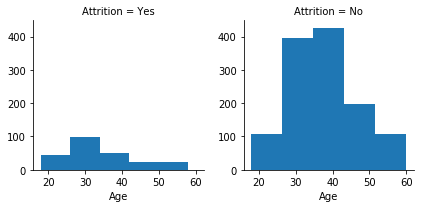

In [40]:
#let's do some visualizing
#Let's see if there's any age discrimination when it comes to leaning...
import seaborn as sns
%matplotlib inline
g = sns.FacetGrid(data, col = 'Attrition')
g.map(plt.hist,'Age', bins = 5)

In [41]:
#many are fired within the 30years old range. however, because the employees' age 
#cluster around 30-40 years, we can't really conclude without % of attrition.
#attrition = 1 is the same from 40ish to near 60. However, there are twice as many employees within the 40-50 years old range than the 50-60
#-> there might be an age factor for the between 40-60 y.o range. Similar could be apply for the 20-30 range.

In [74]:
#AmateurHour: I didn't see the attrition attribute was yes/no. Might as well turn it into 1 and 0 now
data["Attrition"] = data["Attrition"].astype('category')
data["Attrition_cat"] = data["Attrition"].cat.codes
#I used cat.codes to add a new column called attrition_cat as below. Cool!

In [75]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_cat
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [77]:
data["BusinessTravel"] = data["BusinessTravel"].astype('category')
data["BusinessTravel_cat"] = data["BusinessTravel"].cat.codes
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_cat,BusinessTravel_cat
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,2
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,0,8,2,2,7,7,3,6,0,1
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,3,12,3,2,1,0,0,0,0,2
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,1,1,2,3,1,0,0,0,0,2
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,0,10,2,3,9,7,1,8,0,1
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,17,3,2,7,7,7,7,0,2


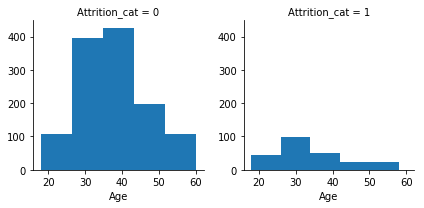

In [78]:
import seaborn as sns
%matplotlib inline
g = sns.FacetGrid(data, col = 'Attrition_cat')
g.map(plt.hist,'Age', bins = 5)

#this graph will be a bit better than the one above

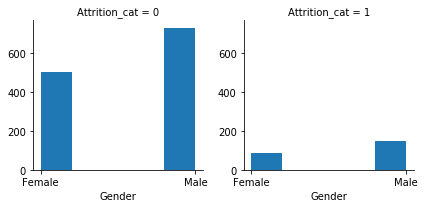

In [79]:
#let do it once again with Gender
import seaborn as sns
%matplotlib inline
g = sns.FacetGrid(data, col = 'Attrition_cat')
g.map(plt.hist,'Gender', bins = 5)

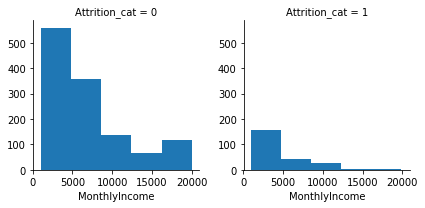

In [59]:
#no biggie here in my opinion. The ratios reflect the differences in total employment.
#what are other factors that might contribute to Attrition?
#1. Age
#2. MonthlyIncome
import seaborn as sns
%matplotlib inline
g = sns.FacetGrid(data, col = 'Attrition_cat')
g.map(plt.hist,'MonthlyIncome', bins = 5)

In [60]:
#the folks who make good bucks at the firm tend to stay. It could be the money or the firm take care of them very well.
#the ratio makes sense where lower income folks are let go more often cuz it costs the company less in the long run

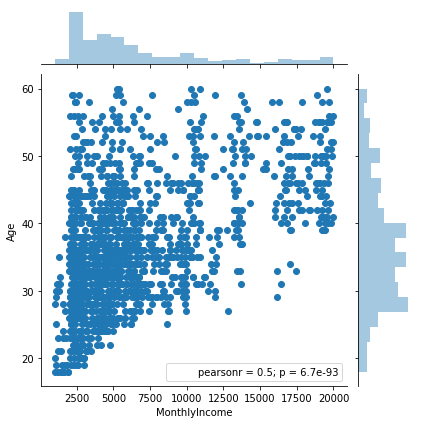

In [80]:
#further proof of income that might help with the prediction
sns.jointplot(data.MonthlyIncome,data.Age, kind = 'scatter')
plt.show()

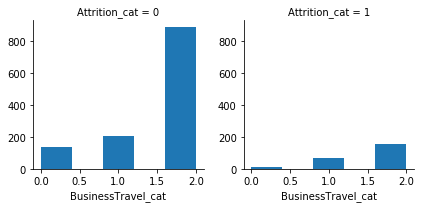

In [82]:
import seaborn as sns
%matplotlib inline
g = sns.FacetGrid(data, col = 'Attrition_cat')
g.map(plt.hist,'BusinessTravel_cat', bins = 5)

In [83]:
#0 = non-travel
#1=  travel freq
#3 = travel rarely
#Once again it seems that this variable might not be material since there are more people who travel rarely and the ratio reflects the attrition population

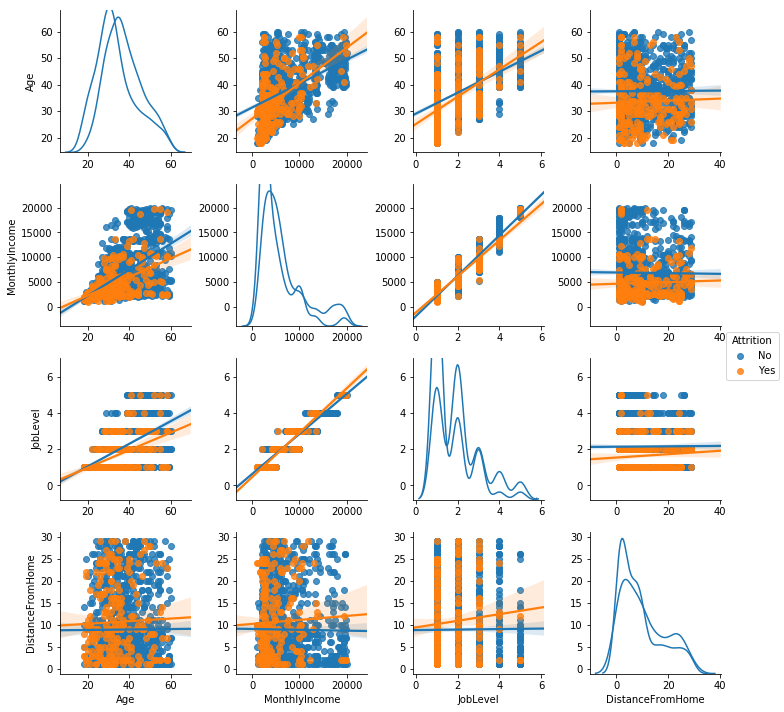

In [88]:
#this part i have to give credit to to DevenDray. His pairplots are too good.
col = ['Attrition', 'Age', 'MonthlyIncome','JobLevel','DistanceFromHome']
sns.pairplot(data[col], kind = 'reg', diag_kind = 'kde', hue = 'Attrition')

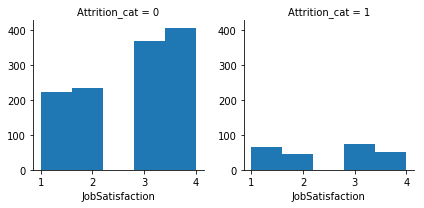

In [89]:
import seaborn as sns
%matplotlib inline
g = sns.FacetGrid(data, col = 'Attrition_cat')
g.map(plt.hist,'JobSatisfaction', bins = 5)

In [90]:
#interesting! Job Satisfaction does matter. Almost double in population while similar Attrition.